### Import packages

In [51]:
# import bnlearn as bn
import torch
from dagma import utils
from dagma.linear import DagmaLinear
from dagma.nonlinear import DagmaMLP, DagmaNonlinear
# Import pandas

import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import math


In [52]:
# reading csv file
df = pd.read_csv("../data/asiaBnlearn.csv")
print(df.head())

df = df.replace({'yes': 1, 'no': 0})
# Remove column name 'A'
df=df.drop(columns=df.columns[0],axis=1)

   Unnamed: 0  asia  tub  smoke  lung  bronc  either  xray  dysp
0           0     1    1      0     1      1       1     1     1
1           1     1    1      1     1      1       1     1     0
2           2     1    1      0     1      0       1     1     0
3           3     1    1      1     1      1       1     1     1
4           4     1    1      1     1      0       1     1     0


In [ ]:
bnDAG = bn.structure_learning.fit(df)
bn.plot(bnDAG)

### Generate data

In [53]:


# print(df.head())
dOld = df.copy()
dLogit = df.copy()
# get columns
nr = len(df)
print(nr)
# transform to the logit form
for col in  df.columns:
    var = df[col].copy()
    freq = var.value_counts().to_dict()
    # print(freq)
    # compute logit
    for key in freq.keys():
        # print(key)
        prob = freq[key] / float(nr)
        logitval = math.log(prob/(1.0-prob))
        # print(logitval)
        var = var.replace(to_replace=key,value=logitval)
        # print(var)
    # print(freq)
    # replace column values to freq
    dLogit[col] = var

print(dLogit.head())
print(df.head())
arrLogit = dLogit.to_numpy()
print(arrLogit)
dLogit.to_csv('../data/asiaLogit.csv')


10000
       asia       tub   smoke      lung     bronc    either      xray  \
0  4.625882  4.536245  0.0088  2.787562  0.182908  2.616248  2.051509   
1  4.625882  4.536245 -0.0088  2.787562  0.182908  2.616248  2.051509   
2  4.625882  4.536245  0.0088  2.787562 -0.182908  2.616248  2.051509   
3  4.625882  4.536245 -0.0088  2.787562  0.182908  2.616248  2.051509   
4  4.625882  4.536245 -0.0088  2.787562 -0.182908  2.616248  2.051509   

       dysp  
0  0.252534  
1 -0.252534  
2 -0.252534  
3  0.252534  
4 -0.252534  
   asia  tub  smoke  lung  bronc  either  xray  dysp
0     1    1      0     1      1       1     1     1
1     1    1      1     1      1       1     1     0
2     1    1      0     1      0       1     1     0
3     1    1      1     1      1       1     1     1
4     1    1      1     1      0       1     1     0
[[ 4.62588204  4.5362447   0.00880006 ...  2.6162483   2.05150894
   0.25253357]
 [ 4.62588204  4.5362447  -0.00880006 ...  2.6162483   2.05150894
  -0.2

In [7]:
# convert to nparray
arr = df.to_numpy()
arrFloat = arr.astype('float')
print(arr)

[[0 1 0 ... 0 0 1]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 1 0 ... 0 0 1]]


In [78]:
# treating as categorical data
model = DagmaLinear(loss_type='logistic') # create a linear model with least squares loss
W_est = model.fit(arr,lambda1=0.03) # fit the model with L1 reg. (coeff. 0.02)

  0%|          | 0/180000.0 [00:00<?, ?it/s]

In [68]:
# treating as continuous data
model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
W_est = model.fit(arrFloat,lambda1=0.01) # fit the model with L1 reg. (coeff. 0.02)


  0%|          | 0/180000.0 [00:00<?, ?it/s]

In [71]:
# treating as logit continous data
model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
W_est = model.fit(arrLogit,lambda1=0.01) # fit the model with L1 reg. (coeff. 0.02)


  0%|          | 0/180000.0 [00:00<?, ?it/s]

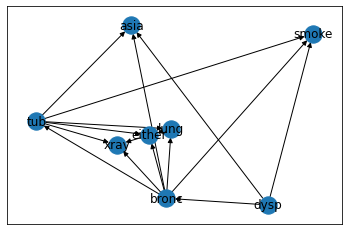

In [79]:
# print(W_est)
graph = nx.DiGraph()
# iterating the columns
nodeNames = df.columns.to_numpy()
# print(nodeNames)
# for col in df.columns:
#     print(col)
rows = int(W_est.size/nodeNames.size)
# print(rows)
for r in range(rows):
    row = W_est[r]
    # print(r)
    for c in range(row.size):
        val = W_est[r,c]
        if val != 0.0:
            # print(val)
            graph.add_edge(nodeNames[r],nodeNames[c],weight = val)


plt.tight_layout()
nx.draw_networkx(graph, arrows=True)

In [3]:
utils.set_random_seed(1)
# Create an Erdos-Renyi DAG of 20 nodes and 20 edges in expectation with Gaussian noise
# number of samples n = 500
n, d, s0 = 500, 20, 20 
graph_type, sem_type = 'ER', 'gauss'

B_true = utils.simulate_dag(d, s0, graph_type)
W_true = utils.simulate_parameter(B_true)
X = utils.simulate_linear_sem(W_true, n, sem_type)



C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dell\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Test Linear Model

In [8]:
model = DagmaLinear(loss_type='l2') # create a linear model with least squares loss
W_est = model.fit(X, lambda1=0.02) # fit the model with L1 reg. (coeff. 0.02)
acc = utils.count_accuracy(B_true, W_est != 0) # compute metrics of estimated adjacency matrix W_est with ground-truth
print(acc)

  0%|          | 0/180000.0 [00:00<?, ?it/s]

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 20}


### Test Nonlinear Model

In [9]:
# note: using torch.double instead of torch.float gives better result for larger num of nodes
eq_model = DagmaMLP(dims=[d, 10, 1], bias=True, dtype=torch.double) # create the model for the structural equations, in this case MLPs
model = DagmaNonlinear(eq_model, dtype=torch.double) # create the model for DAG learning
W_est = model.fit(X, lambda1=0.02, lambda2=0.005) # fit the model with L1 reg. (coeff. 0.02) and L2 reg. (coeff. 0.005)
acc = utils.count_accuracy(B_true, W_est != 0) # compute metrics of estimated adjacency matrix W_est with ground-truth
print(acc)

  0%|          | 0/230000.0 [00:00<?, ?it/s]

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 20}
